In [ ]:
#installing pgmpy

!pip install pgmpy

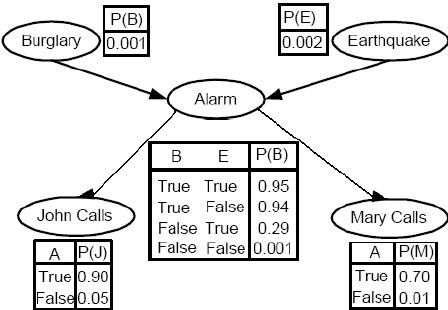

In [ ]:
#Graphical model of the problem

from IPython.display import Image
Image("CPT_TABLE.png",width=800,height=500)

In [ ]:
#Modules For Bayesian network
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [ ]:
#Defining the Model structure
model = BayesianModel([('B', 'A'), ('E', 'A'), ('A', 'J'), ('A', 'M')])
model

In [ ]:
#Defining individual cpds

cp_B = TabularCPD(variable='B', variable_card=2, values=[[0.001] ,[0.999]], state_names={'B': ['TRUE', 'FALSE']})
cp_E = TabularCPD(variable='E', variable_card=2, values=[[0.002], [0.998]], state_names={'E': ['TRUE', 'FALSE']})
print(cp_B)
print();print(cp_E)

+----------+-------+
| B(TRUE)  | 0.001 |
+----------+-------+
| B(FALSE) | 0.999 |
+----------+-------+

+----------+-------+
| E(TRUE)  | 0.002 |
+----------+-------+
| E(FALSE) | 0.998 |
+----------+-------+


In [ ]:
#Alarm CPD
cp_A= TabularCPD(variable='A', variable_card=2, values=[[0.95,0.94,0.29,0.001],[0.05,0.06,0.71,0.999]],evidence=['B', 'E'],evidence_card=[2, 2],
                      state_names={'A': ['T','F'],'B': ['TRUE', 'FALSE'],'E': ['TRUE', 'FALSE']})
print(cp_A)

+------+---------+----------+----------+----------+
| B    | B(TRUE) | B(TRUE)  | B(FALSE) | B(FALSE) |
+------+---------+----------+----------+----------+
| E    | E(TRUE) | E(FALSE) | E(TRUE)  | E(FALSE) |
+------+---------+----------+----------+----------+
| A(T) | 0.95    | 0.94     | 0.29     | 0.001    |
+------+---------+----------+----------+----------+
| A(F) | 0.05    | 0.06     | 0.71     | 0.999    |
+------+---------+----------+----------+----------+


In [ ]:
#JOHN CPD
cp_J= TabularCPD(variable='J', variable_card=2, values=[[0.90,0.05], [0.10,0.95]],evidence=['A'],evidence_card=[2],state_names={'J': ['TRUE', 'FALSE'],'A':['TRUE','FALSE']})
print(cp_J)

+----------+---------+----------+
| A        | A(TRUE) | A(FALSE) |
+----------+---------+----------+
| J(TRUE)  | 0.9     | 0.05     |
+----------+---------+----------+
| J(FALSE) | 0.1     | 0.95     |
+----------+---------+----------+


In [ ]:
#MERY CPD
cp_M = TabularCPD(variable='M', variable_card=2, values=[[0.70,0.01], [0.30,0.99]],evidence=['A'],evidence_card=[2],state_names={'M': ['TRUE', 'FALSE'],'A':['TRUE','FALSE']})
print(cp_M)

+----------+---------+----------+
| A        | A(TRUE) | A(FALSE) |
+----------+---------+----------+
| M(TRUE)  | 0.7     | 0.01     |
+----------+---------+----------+
| M(FALSE) | 0.3     | 0.99     |
+----------+---------+----------+


In [ ]:
#adding all cpds

model.add_cpds(cp_E,cp_B,cp_A,cp_M,cp_J)
model.check_model()

True

In [ ]:
#model independencies

model.get_independencies()

(B _|_ E)
(B _|_ M, J | A)
(B _|_ J | M, A)
(B _|_ M | A, J)
(B _|_ M, J | A, E)
(B _|_ J | M, E, A)
(B _|_ M | A, J, E)
(E _|_ B)
(E _|_ M, J | A)
(E _|_ J | M, A)
(E _|_ M | A, J)
(E _|_ M, J | A, B)
(E _|_ J | M, A, B)
(E _|_ M | A, J, B)
(J _|_ M, E, B | A)
(J _|_ E, B | M, A)
(J _|_ M, B | A, E)
(J _|_ M, E | A, B)
(J _|_ B | M, E, A)
(J _|_ E | M, A, B)
(J _|_ M | A, E, B)
(M _|_ J, E, B | A)
(M _|_ E, B | A, J)
(M _|_ J, B | A, E)
(M _|_ J, E | A, B)
(M _|_ B | A, J, E)
(M _|_ E | A, J, B)
(M _|_ J | A, E, B)

In [ ]:
#getting childeren of each node

print(model.get_children('E'))
print(model.get_children('B'))
print(model.get_children('A'))
print(model.get_children('J'))
print(model.get_children('M'))

['A']
['A']
['J', 'M']
[]
[]


In [ ]:
#inference using Variable Elimination

from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [ ]:
#testing

g_dist = infer.query(['B'])
print(g_dist)

Eliminating: E: 100%|██████████| 4/4 [00:00<00:00, 244.80it/s]

+----------+----------+
| B        |   phi(B) |
+==========+==========+
| B(TRUE)  |   0.0010 |
+----------+----------+
| B(FALSE) |   0.9990 |
+----------+----------+


In [ ]:
#testing

print(infer.query(['B'], evidence={'J': 'TRUE', 'M': 'TRUE'}))

Eliminating: A: 100%|██████████| 2/2 [00:00<00:00, 463.46it/s]

+----------+----------+
| B        |   phi(B) |
+==========+==========+
| B(TRUE)  |   0.2842 |
+----------+----------+
| B(FALSE) |   0.7158 |
+----------+----------+
